In [1]:
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
from amftrack.util.plot import gridplot, make_stat
%load_ext autoreload
%autoreload 2
from matplotlib.patches import Ellipse
import logging
import warnings
logging.getLogger().setLevel(logging.WARNING)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

all_analysis_folders = get_analysis_folders("data")

plate_select = [792,1014,1042,127,130,1023,1045,1053,1048,52,84,938,1076,94,152,102,76,3,12,16,480,91,799,800] #C2
plates = ['1014_20220525', '1023_20220502', '102_20201226', '1042_20220523',
       '1045_20220504', '1048_20220506', '1053_20220413', '1076_20220511',
       '127_20220705', '130_20220707', '152_20201224',"3_20220426", "12_20220502","16_20220419","480_20221205", '52_20220707', '76_20210108',
       '792_20210915', '799_20211001', '800_20210928', '84_20220621', '91_20220708', '938_20220325', '94_20201123']

analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]


C:\Users\coren\Documents\PhD\paper\travelling_wave\AMFTravellingWave\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,False)

In [3]:
Css = {}
lambss = {}
dss = {}
meancurves = {}
meancurves2 = {}
t0ss = {}
rsquared = {}

timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 65,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:150,152:35,792:60,1048:60,1045:50,941:50}
timestep2 = {102:25,83:70,76:20,81:70,32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:50,1048:60,1045:50}
timestep = {**timestep, **timestep2}
timestep2 = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
timestep = {**timestep, **timestep2}
timestep2 = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:40}
timestep = {**timestep, **timestep2}    

timestep2 = {1071 : 25,1076:70,839:60,938 : 35}
timestep = {**timestep, **timestep2}
timestep2 = {30 : 62,32 : 160,33:80}
timestep = {**timestep, **timestep2}
timestep2 = {799 : 100,800 : 25,91:100,99:40}
timestep = {**timestep, **timestep2}
timestep2 = {3:144,16 : 39, 12:70,480:150,28 : 100}
timestep = {**timestep, **timestep2}

In [4]:
time_plate_info["density"] = time_plate_info["tot_length_study"]/time_plate_info["area_sep_comp"]
Ds={}
for plate in plates:
    select = time_plate_info.loc[time_plate_info["unique_id"] == int(plate)]
    Ds[plate] = select["density"].iloc[timestep[int(plate.split('_')[0])]]

In [5]:
data = [29.448598861694336,
 33.77727508544922,
 232.8802947998047,
 31.537221908569336,
 12.936720848083496,
 12.868404388427734,
 11.403223991394043,
 40.07711410522461,
 43.12382888793945,
 49.837528228759766,
 32.38702392578125,
 31.267343521118164,
 32.405029296875,
 17.28557586669922,
 12.938458442687988,
 13.938224792480469,
 8.173038482666016,
 8.688986778259277,
 8.704690933227539,
 10.036430358886719,
 11.11474323272705,
 10.832844734191895,
 42.571205139160156,
 38.00281524658203,
 41.57780456542969]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
labels =["dens_AMF"] * len(list(Ds.values()))+["dens_free"] * len(data)
values = [D for D in Ds.values()]+[D*1000 for D in data]
df = pd.DataFrame({"density":values,"AMF_free" : labels},columns = ["density","AMF_free"])
# fig, ax = plt.subplots()
# Create the boxplot


In [7]:
data_myr = pd.read_csv('data/myristate.csv')
data_myr = data_myr[data_myr["medium"]=="'0.5Myr'"]


In [8]:
data_control = pd.read_csv('data/control.csv')
data_control = data_control[data_control["density"]<=10000]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["dens_AMF"] * len(list(Ds.values()))+["dens_free"] * len(data)+['Myr'] * len(data_myr)
labels += ['control']*len(data_control)
values = [D for D in Ds.values()]+[D*1000 for D in data]+data_myr['density'].to_list()
values += data_control['density'].to_list()
df = pd.DataFrame({"density":values,"AMF_free" : labels},columns = ["density","AMF_free"])

C:\Users\coren\AppData\Local\Temp\ipykernel_22952\3811249961.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['AMF','Free \n Living'])


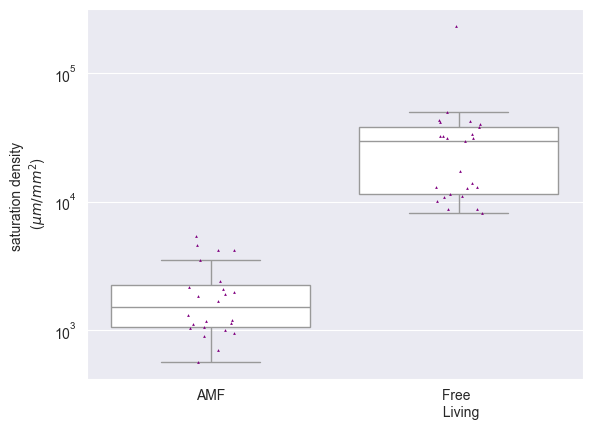

In [10]:

df = df[df['AMF_free'].isin(["dens_AMF","dens_free"])]
fig,ax = plt.subplots()
category_order = ['dens_AMF', 'dens_free']
sns.boxplot(x='AMF_free', y = "density",data=df, ax=ax, color='white', fliersize=0, order=category_order)
sns.stripplot(x='AMF_free', y = "density", data=df, ax=ax, color='purple', marker='^',size = 2, order=category_order)
ax.set_ylabel("saturation density \n ($\mu m/mm^{2}$)")
ax.set_xticklabels(['AMF','Free \n Living'])

ax.set_xlabel('')
ax.set_yscale("log")


In [11]:
treatments = colors.keys()

values_density = {strain : [] for strain in folders['strain'].unique()}
values_density_treatment = {strain : [] for strain in treatments}
for plate_id in plates:
    plate  = int(plate_id.split('_')[0])
    D = Ds[plate_id]
    strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
    medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
    treatment = strain+medium
    values_density[strain].append(D)
    values_density_treatment[treatment].append(D)

for plate_id in plates:
    plate  = int(plate_id.split('_')[0])
    D = Ds[plate_id]
    strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
    medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
    if medium in ["'001P100N200C-T'","'001P100N200C'"]:
        print(plate_id)
    treatment = strain+medium

values_density_treatment["'A5''001P100N100C'"] += values_density_treatment["'A5''001P100N'"]+values_density_treatment["'A5sp3''001P100N100C'"]
values_density_treatment["'A5''001P100N200C'"] += values_density_treatment["'A5''001P100N200C-T'"]
values_density_treatment["'Agg''001P100N100C'"] += values_density_treatment["'Agg''001P100N200C'"]
strains = list(values_density.keys())
strains.remove("'A5sp3'")
colors_strain = {"'A5'" : 'orange',"'C2'" : 'blue',"'Agg'":'black'}
treatments_real=["'A5''001P100N100C'","'A5''001P100N200C'","'C2''001P100N100C'","'C2''001P100N200C'","'Agg''001P100N100C'"]

1023_20220502
1045_20220504
1053_20220413
1076_20220511
938_20220325


In [15]:
counts = {}
for treatment in treatments_real:
    counts[treatment]=len(values_density_treatment[treatment])

In [16]:
counts

{"'A5''001P100N100C'": 10,
 "'A5''001P100N200C'": 2,
 "'C2''001P100N100C'": 5,
 "'C2''001P100N200C'": 3,
 "'Agg''001P100N100C'": 4}

In [12]:
values_density_treatment_clean = {}
treatments_select=["'A5''001P100N100C'","'A5''001P100N200C'","'C2''001P100N100C'","'C2''001P100N200C'"]
for treatment in treatments_select:
    values_density_treatment_clean[treatment]=values_density_treatment[treatment]

C:\Users\coren\AppData\Local\Temp\ipykernel_22952\498106681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y = "Value",data=df_melted, ax=ax, color='white', fliersize=0,palette = colors)
C:\Users\coren\AppData\Local\Temp\ipykernel_22952\498106681.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['A5 \n 100C', 'A5 \n 200C','C2 \n 100C', 'C2 \n 200C'])


Text(0.5, 0, '')

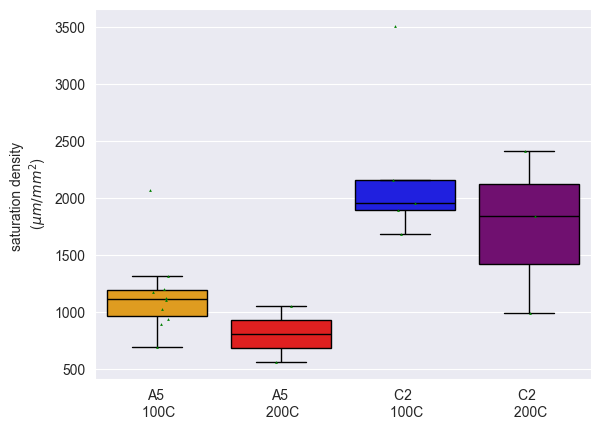

In [13]:
df = pd.DataFrame.from_dict(values_density_treatment_clean, orient='index').transpose()

# Melt the DataFrame for plotting
df_melted = df.melt(var_name='Category', value_name='Value').dropna()
fig,ax = plt.subplots()
sns.boxplot(x='Category', y = "Value",data=df_melted, ax=ax, color='white', fliersize=0,palette = colors)
# Add the individual points
sns.stripplot(x='Category', y = "Value", data=df_melted, ax=ax, color='green', marker='^',size = 2)
ax.set_ylabel("saturation density \n ($\mu m/mm^{2}$)")
ax.set_xticklabels(['A5 \n 100C', 'A5 \n 200C','C2 \n 100C', 'C2 \n 200C'])

ax.set_xlabel('')

In [26]:
data_myr = pd.read_csv('data/myristate.csv')
data_myr = data_myr[data_myr["medium"]=="'0.5Myr'"]
time_plate_info["density"] = time_plate_info["tot_length_study"]/time_plate_info["area_sep_comp"]
Ds={}
for plate in plates:
    select = time_plate_info.loc[time_plate_info["unique_id"] == int(plate)]
    if select['strain'].iloc[0]  in ["'C2'","'A5'"]:
        Ds[plate] = select["density"].iloc[timestep[int(plate.split('_')[0])]]
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["dens_AMF"] * len(list(Ds.values()))+["dens_free"] * len(data)+['Myr'] * len(data_myr)
labels += ['control']*len(data_control)
values = [D for D in Ds.values()]+[D*1000 for D in data]+data_myr['density'].to_list()
values += data_control['density'].to_list()
df = pd.DataFrame({"density":values,"AMF_free" : labels},columns = ["density","AMF_free"])


C:\Users\coren\AppData\Local\Temp\ipykernel_22952\3364429384.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Symbiotic', 'Myr'])


Text(0.5, 0, '')

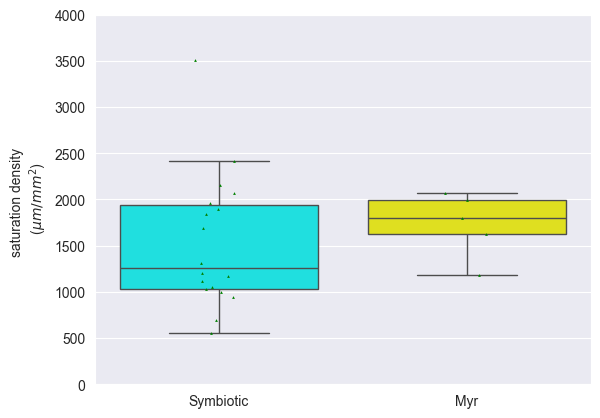

In [18]:
df = df[df['AMF_free'].isin(["dens_AMF","Myr"])]
colors = {"dens_AMF" : "cyan","Myr":"yellow"}
fig,ax = plt.subplots()
sns.boxplot(x='AMF_free', y = "density",data=df, ax=ax, fliersize=0,palette=colors,hue = "AMF_free")
# Add the individual points
sns.stripplot(x='AMF_free', y = "density", data=df, ax=ax, color='green', marker='^',size = 2)
# ax.set_yscale("log")
ax.set_ylabel("saturation density \n ($\mu m/mm^{2}$)")
ax.set_xticklabels(['Symbiotic', 'Myr'])
ax.set_ylim(0,4000)

# Remove x-label
ax.set_xlabel('')
# plt.savefig(os.path.join(path_figure,'FigureS4Brebutal_Myr.pdf'), transparent=True, bbox_inches='tight')gzerhh

C:\Users\coren\AppData\Local\Temp\ipykernel_22952\718692066.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['genotype 1', 'genotype 2'])


(25.0, 155.0)

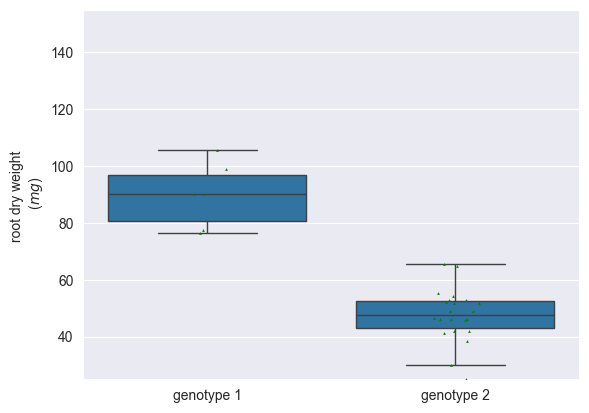

In [19]:
harvest_root = pd.read_excel("data/harvest_data.xlsx")
harvest_root['dry_root'] = harvest_root['dry root [mg]']*1000
category_order = ['CarrotToby', 'CarrotEN']

select = harvest_root[harvest_root['fungus']=='C2']
fig,ax = plt.subplots()
sns.boxplot(x='Root', y = 'dry_root',data=select, ax=ax, fliersize=0,order = category_order)
# Add the individual points
sns.stripplot(x='Root', y = 'dry_root', data=select, ax=ax, color='green', marker='^',size = 2,order = category_order)
ax.set_xlabel("")
ax.set_xticklabels(['genotype 1', 'genotype 2'])
ax.set_ylabel("root dry weight \n ($mg$)")
ax.set_ylim(25,155)


C:\Users\coren\AppData\Local\Temp\ipykernel_22952\2103838686.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['genotype 1', 'genotype 2'])


(0.0, 4000.0)

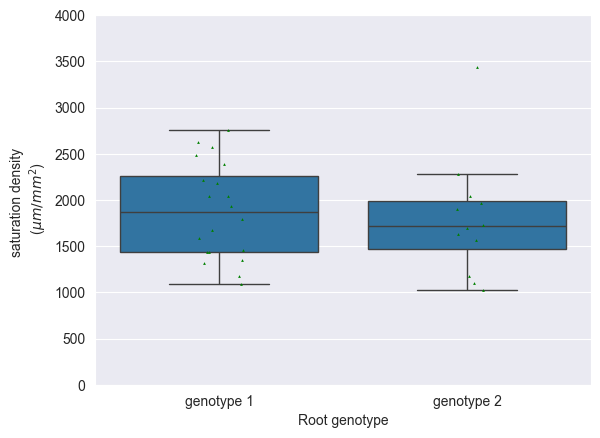

In [37]:


flierprops = dict(markersize=1)
fig,ax = plt.subplots()
select = pd.read_csv("data/sat_dens_genotypes.csv")

sns.boxplot(select,x='real_root', y = "density_Lum", ax=ax, showfliers=False)
sns.stripplot(select,x='real_root', y = "density_Lum", ax=ax, color='green', marker='^',size = 2,)
ax.set_xticklabels(['genotype 1', 'genotype 2'])
ax.set_xlabel("Root genotype")
ax.set_ylabel("saturation density \n ($\mu m/mm^{2}$)")
ax.set_ylim(0,4000)


In [35]:
select.groupby('real_root').count()

,Unnamed: 0,plate_id,start_x,speed,density_SA,density_BV,density_L,radius,radius_SA,strain,...,Suitable for coarse grain,Suitable for tracking,Suitable for width,Comments analysis,Analysis priority,Running,Suitable for spores,date_fungus,age,density_Lum
real_root,,,,,,,,,,,,,,,,,,,,,
Carrot Toby,27,27,27,20,20,20,20,20,20,27,...,21,20,21,20,0,1,2,27,27,20
Carrot Vasilis,18,18,18,13,12,12,12,12,12,18,...,18,16,16,16,0,0,0,9,18,12


In [27]:
data_harvest = pd.read_csv("data/2022_CarbonExperiment.csv",sep=";")
data_harvest['treatment'] = data_harvest['treatment']+data_harvest['fungus']


C:\Users\coren\AppData\Local\Temp\ipykernel_22952\1502225196.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='treatment', y = "dry root [mg]",data=select, ax=ax, color='white', fliersize=0,palette = colors, order=treatment_order)
C:\Users\coren\AppData\Local\Temp\ipykernel_22952\1502225196.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['A5 \n 100C', 'A5 \n 200C','C2 \n 100C', 'C2 \n 200C'])


Text(0.5, 0, '')

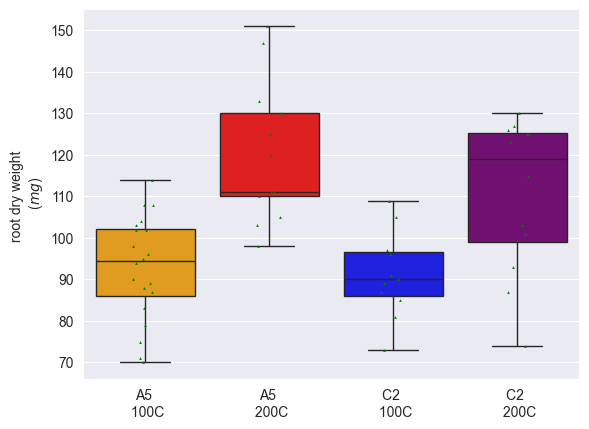

In [30]:
import seaborn as sns

colors = {
    '100CA5': 'orange',
    '200CA5': 'red',
    '100CC2': 'blue',
    '200CC2': 'purple'
}
treatment_order = list(colors.keys())
select=data_harvest[data_harvest['treatment'].isin(colors.keys())]

fig,ax = plt.subplots()
sns.boxplot(x='treatment', y = "dry root [mg]",data=select, ax=ax, color='white', fliersize=0,palette = colors, order=treatment_order)
# Add the individual points
sns.stripplot(x='treatment', y = "dry root [mg]", data=select, ax=ax, color='green', marker='^',size = 2, order=treatment_order)
# ax.set_yscale("log")
ax.set_ylabel("root dry weight \n ($mg$)")
ax.set_xticklabels(['A5 \n 100C', 'A5 \n 200C','C2 \n 100C', 'C2 \n 200C'])

# Remove x-label
ax.set_xlabel('')
# plt.savefig(os.path.join(path_figure,'FigureS4_root_weight.pdf'), transparent=True, bbox_inches='tight')

In [31]:
select.groupby('treatment').count()


,#,fungus,start,crossed,harvest,days until harvest,fresh root [g],dry root [mg],agar root[g],agar left [g],agar right [g],Remarks,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
treatment,,,,,,,,,,,,,,,,,,,
100CA5,20,20,20,20,20,20,20,20,20,20,20,3,0,0,0,0,0,0,0
100CC2,11,11,11,11,11,11,11,11,11,11,11,2,0,0,0,0,0,0,0
200CA5,13,13,13,13,13,13,13,13,13,13,13,0,0,0,0,0,0,0,0
200CC2,12,12,12,12,12,12,12,12,12,12,12,2,0,0,0,0,0,0,0


In [19]:
folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders,False)

In [20]:
plate_id

'94_20201123'

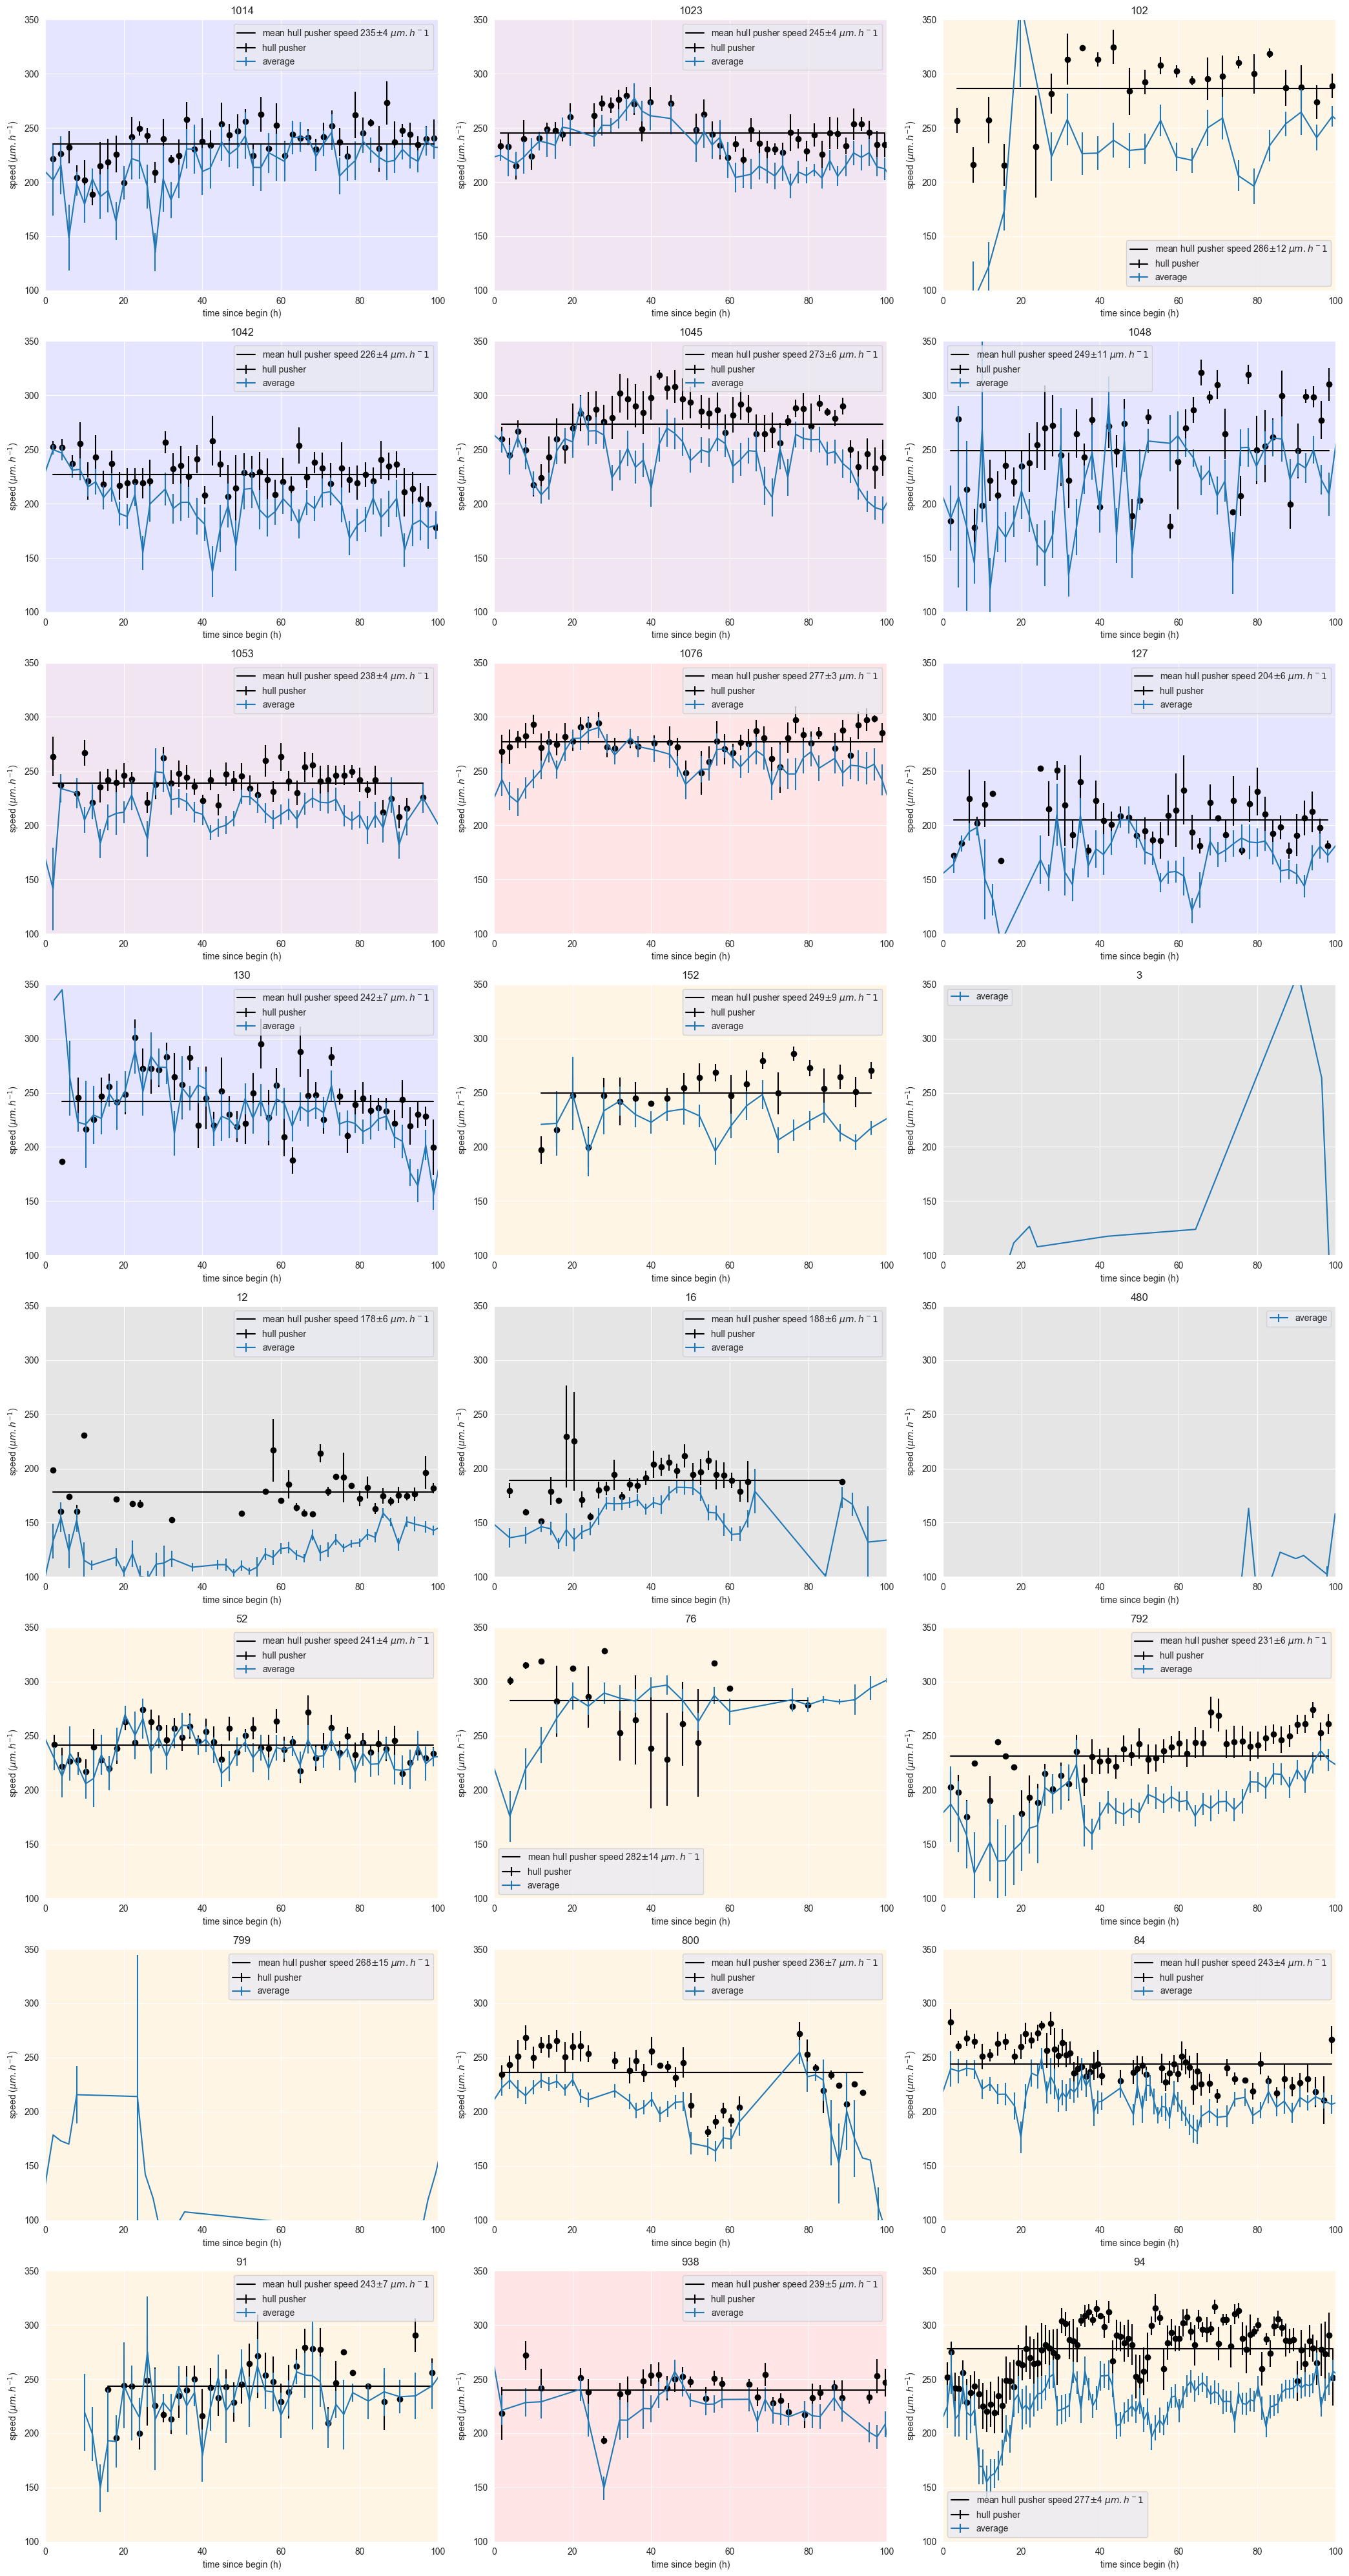

In [21]:
ncols = 3
fig,axs = gridplot(len(plate_select),ncols = ncols,subh = 5,subw = 7)
ax_list = list(axs)
min_time = {plate_id : 0 for plate_id in plates}
max_time = {plate_id : 100 for plate_id in plates}
min_time['799_20211001'] = 100
max_time['799_20211001'] = 200
hull_speeds_dic = {}
hull_time_dic = {}
datas = {}
dys = {}
for j in range(len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    ax = ax_list[j]
    hull_speeds = []
    hull_time = []
    time_hypha_plate = time_hypha_info.loc[time_hypha_info['unique_id']==int(plate_id)]
    data,dy,select_movements = get_average_time_data(int(plate_id),time_hypha_plate,2)
    hyphae_hull = get_hyphae_hull(plate_id,analysis_folders)
    if len(hyphae_hull)>0:
        label = 'hull pusher'
        for t in range(1,min(len(time_hypha_plate['timestep'].unique()),len(hyphae_hull)-1)):
            if (t+1) in hyphae_hull.keys() and (t) in hyphae_hull.keys() and (t-1) in hyphae_hull.keys():
                select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
                select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
                select = select.loc[select['speed'].between(150,350)]
                if len(select)>0:
                    time = select['time_since_begin_h'].iloc[0]
                    if time/pd.Timedelta(hours = 1)<=max_time[plate_id] and time/pd.Timedelta(hours = 1)>=min_time[plate_id]:
                        ax.scatter(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]),color='black')
                        ax.errorbar(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1),np.mean(select["speed"]),np.std(select["speed"])/np.sqrt(len(select)),color='black',label=label)
                        label = None
                        hull_speeds.append(np.mean(select["speed"]))
                        hull_time.append(select['time_since_begin_h'].iloc[0]/pd.Timedelta(hours = 1))
    
                    select = time_hypha_plate.loc[time_hypha_plate['timestep']==t]
                    # select = select.loc[select['end'].isin(hyphae_hull[t-1]) |select['end'].isin(hyphae_hull[t]) |select['end'].isin(hyphae_hull[t+1])]
            # ax.plot(data.index/pd.Timedelta(hours = 1),data)
        ax.errorbar(data.index/pd.Timedelta(hours = 1),data, yerr=dy,label='average')
        ax.set_xlim(0,150)
        ax.set_ylim(100,350)

        ax.legend()
        # ax.set_title(f'{plate}')
        ax.set_xlabel('time since begin (h)')
        ax.set_ylabel('speed ($\mu m.h^{-1}$)')
            # break
        ax.set_xlim(0,100)
        plt.tight_layout()
        if len(hull_speeds)>0:
            ax.plot(hull_time,[np.mean(hull_speeds)]*len(hull_time),
                    color="black",
                    label= f'mean hull pusher speed {int(np.nanmean(hull_speeds))}$\pm${int(2*np.nanstd(hull_speeds)/np.sqrt(len(hull_speeds)))} $\mu m.h^{-1}$')
            ax.legend()
    datas[plate] = data
    dys[plate] = dy
    hull_speeds_dic[plate] = hull_speeds
    hull_time_dic[plate] = hull_time
    ax.patch.set_facecolor(get_color(plate,folders))
    ax.patch.set_alpha(0.1)
    ax.set_title(plate)
    plt.tight_layout()

In [22]:
hull_speed_dic_2 = {3: [187.5272095738,
  175.8880961916,
  181.0341688969,
  186.93168098243333,
  191.20227389895,
  200.151785636225,
  197.03390571885,
  183.8596080696333,
  220.0785906361,
  193.5472222209,
  203.90255775383332,
  216.15471250925,
  201.71558800575002,
  203.78559251068,
  187.74800241684,
  191.3043379626,
  190.99610155506664,
  200.220691956475,
  201.7919715434,
  196.48124808875,
  199.59267017509998,
  194.38776232415998,
  201.4108019739,
  220.7887397636,
  199.52873507308,
  219.80392558901667,
  204.9772465131286,
  200.75727733894288,
  184.0716493695286,
  200.01963397248,
  218.76978298031432,
  189.3932908502833,
  204.2273679813167,
  188.81763924319998,
  189.30456274916665,
  187.92222574483998,
  186.08405482630002,
  180.54020222479,
  178.19950072155999,
  176.84910749079998,
  165.7283943066,
  172.98658784319093,
  176.44311387806667,
  190.4048545989125,
  175.7023517568143,
  190.46532827753748,
  181.25242388838333,
  183.53538413808002,
  184.53853569693334,
  193.22252831292855,
  188.49064407336664,
  185.46116467068336,
  187.6166071737167,
  182.3470483986167,
  204.30941706255717,
  193.81934117998333,
  188.59148689813333,
  195.02211043721664,
  179.88368141398,
  194.07421399112854,
  182.14362677243997,
  170.9908806483714,
  191.45287470920002,
  183.37757507208576,
  171.9545156620167,
  192.4543028770857,
  184.49500615604285,
  191.46725077211667,
  192.36904019417145,
  193.62682133153336,
  175.53802982145717,
  188.0863949616286,
  180.12141667857142,
  187.28172324741428,
  181.60144766208572,
  185.43814573725,
  189.527605742925,
  178.4818561070667,
  195.53408071565,
  174.85956289874,
  197.40510907336,
  182.83915195499998,
  173.420118290625,
  191.54000324235],
 12: [198.6853476312,
  160.4918799908,
  174.1542885161,
  160.65849745415,
  230.5720566053,
  171.9497242666,
  167.7386797884,
  167.11751438625,
  152.5396537334,
  158.6911151325,
  178.7427778047,
  257.6106142144,
  169.3189831924,
  196.36391566355002,
  163.731916355975,
  157.0894702901,
  157.99242702225,
  213.97606983433332,
  178.71638159876,
  192.4547479352333,
  191.81526565175,
  184.0321298596,
  172.39138541813335,
  182.5217769237286,
  163.05902132816666,
  174.963728515775,
  169.7159254829,
  175.32195440056668,
  174.93056348754445,
  176.23047879406667,
  196.43829651278335,
  181.96753166567498,
  178.805291547,
  182.091890780725,
  178.231673748575,
  195.6945776387,
  174.59983601188333,
  187.42470198303332,
  176.02449642708575,
  183.0742753422,
  183.31289537034,
  200.43547710798336,
  176.1169568588,
  166.341069235475,
  189.04098852826002,
  173.88569296413334,
  177.845237570925,
  177.63877908665,
  183.310768098025],
 16: [159.73416544429998,
  151.538686697,
  179.11980348950001,
  170.6687144131,
  229.61468212776666,
  225.19739735369998,
  171.40774601729996,
  155.5628689247,
  180.13230107335002,
  181.681121595225,
  194.16335058355557,
  174.1093442442625,
  185.61224055929,
  184.36525121699998,
  203.76331744441816,
  201.60902379528574,
  211.84873784038334,
  207.21653768051996,
  188.1001049662,
  174.20930442436665,
  192.0674656263333,
  184.27451957032,
  175.6356039868],
 480: [173.5635809232,
  150.9540085865,
  159.3134780539,
  164.93972400835,
  162.706523909775,
  166.7205763489,
  169.36771242803331,
  169.4350713417,
  161.9002636264,
  150.4028416606,
  204.3622295959,
  200.4853894885,
  161.1692426558,
  162.4668112327,
  159.8452088992,
  195.1746129664,
  182.89130188365,
  182.0221317085,
  174.624005082725,
  187.5707324278,
  194.81999181077998,
  168.37949980406665,
  170.07054372285,
  160.53046425005,
  157.3225213852,
  175.0363525159,
  175.9225109444,
  167.797724921775,
  183.19135980663336,
  197.9668762364,
  169.89112491039998,
  178.573744361,
  160.8826975936]}

In [23]:
for plate in hull_speed_dic_2.keys():
    hull_speeds_dic[plate] = hull_speed_dic_2[plate] 

In [24]:
folders['treatment'] = folders['strain']+folders['medium']

In [26]:
colors

{'100CC2': 'blue', '200CC2': 'purple'}

KeyError: '3_20220426'

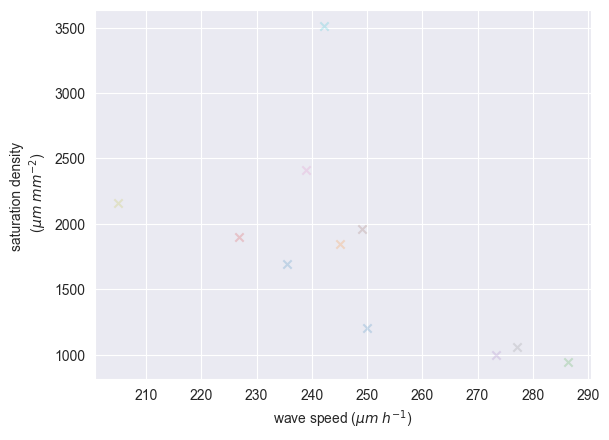

In [28]:
fig,ax = plt.subplots()

ax.set_ylabel('saturation density \n ($\mu m$ $mm^{-2}$)')
ax.set_xlabel('wave speed ($\mu m$ $h^{-1}$)'  ) 
treatments = colors.keys()
treatments = folders['treatment'].unique()
values_speed = {strain : [] for strain in folders['strain'].unique()}
values_density = {strain : [] for strain in folders['strain'].unique()}
values_speed_treatment = {strain : [] for strain in treatments}
values_density_treatment = {strain : [] for strain in treatments}
for plate_id in plates:
    plate  = int(plate_id.split('_')[0])
    # D = Ds[plate_id]
    hull_speed = hull_speeds_dic[plate]
    strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
    medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
    treatment = strain+medium
    values_speed[strain].append(np.mean(hull_speed))
    values_density[strain].append(D)
    values_speed_treatment[treatment].append(np.mean(hull_speed))
    values_density_treatment[treatment].append(D)

for plate_id in plates:
    plate  = int(plate_id.split('_')[0])
    D = Ds[plate_id]
    hull_speed = hull_speeds_dic[plate]
    strain = folders.loc[folders['Plate']==plate].iloc[0]['strain']
    medium = folders.loc[folders['Plate']==plate].iloc[0]['medium']
    treatment = strain+medium
    ax.scatter(np.mean(hull_speed),D,alpha=0.2,marker ='x') 
    
    # ax.scatter(np.mean(hull_speed),D,color=colors[treatment],alpha=0.2,marker ='x') 

values_density_treatment["'A5''001P100N100C'"] += values_density_treatment["'A5''001P100N'"]+values_density_treatment["'A5sp3''001P100N100C'"]
values_speed_treatment["'A5''001P100N100C'"] += values_speed_treatment["'A5''001P100N'"]+values_speed_treatment["'A5sp3''001P100N100C'"]
values_speed_treatment["'Agg''001P100N100C'"] += values_speed_treatment["'Agg''001P100N200C'"]
values_density_treatment["'Agg''001P100N100C'"] += values_density_treatment["'Agg''001P100N200C'"]

strains = list(values_speed.keys())
strains.remove("'A5sp3'")
colors_strain = {"'A5'" : 'orange',"'C2'" : 'blue',"'Agg'":'black'}
treatments_real=["'A5''001P100N100C'","'A5''001P100N200C'","'C2''001P100N100C'","'C2''001P100N200C'","'Agg''001P100N100C'"]
xs = [np.nanmean(values_density_treatment[treatment]) for treatment in treatments_real]
ys = [np.nanmean(values_speed_treatment[treatment]) for treatment in treatments_real]
stdxs = [2*np.nanstd(values_density_treatment[treatment])/np.sqrt(len(values_density_treatment[treatment])) for treatment in treatments_real]
stdys = [2*np.nanstd(values_speed_treatment[treatment])/np.sqrt(len(values_speed_treatment[treatment])) for treatment in treatments_real]
counts = [(treatment,len(values_density_treatment[treatment])) for treatment in treatments_real]

for j,treatment in enumerate(treatments_real):
    ax.scatter(ys[j],xs[j])
    ax.errorbar(ys[j],xs[j], xerr=stdys[j], yerr=stdxs[j],alpha = 0.7)
    # ax.scatter(ys[j],xs[j],color=colors[treatment])
    # ax.errorbar(ys[j],xs[j], xerr=stdys[j], yerr=stdxs[j], color=colors[treatment],alpha = 0.7)
ax.set_yscale('log')
ax.set_ylim(600,10000)


In [ ]:
values_speed_treatment["'A5''001P100N100C'"] += values_speed_treatment["'A5''001P100N'"]+values_speed_treatment["'A5sp3''001P100N100C'"]
values_speed_treatment["'Agg''001P100N100C'"] += values_speed_treatment["'Agg''001P100N100C'"]

In [ ]:
treatments_real=["'A5''001P100N100C'","'A5''001P100N200C'","'C2''001P100N100C'","'C2''001P100N200C'","'Agg''001P100N100C'"]

counts = [(treatment,len(values_speed_treatment[treatment])) for treatment in treatments_real]
counts